In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc, roc_curve,roc_auc_score

In [4]:
student_performance=pd.read_csv('Student_Performance.csv')
student_performance

,Student_ID,Time_Spent_On_App,Past_Grades,attendance_rate,time_spent_on_quiz,question_attemted,pass_fail,topic_difficulty,future_score
0,1,0.087239,70,89,3.872776,22,Pass,Low,90.898301
1,2,7.255753,15,61,0.133803,41,Fail,High,64.262480
2,3,6.781640,80,64,3.359422,41,Pass,Low,96.324858
3,4,3.503155,94,65,4.227397,12,Pass,Low,100.398639
4,5,1.282587,56,80,3.855772,28,Pass,Medium,83.411253
...,...,...,...,...,...,...,...,...,...
4995,4996,2.957194,31,79,2.225866,23,Fail,High,76.329703
4996,4997,1.663244,22,75,0.200699,28,Fail,High,75.110318
4997,4998,3.457798,30,62,0.366396,5,Fail,High,71.941076
4998,4999,1.272101,42,80,1.994229,47,Pass,Medium,82.235527


In [5]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          5000 non-null   int64  
 1   Time_Spent_On_App   5000 non-null   float64
 2   Past_Grades         5000 non-null   int64  
 3   attendance_rate     5000 non-null   int64  
 4   time_spent_on_quiz  5000 non-null   float64
 5   question_attemted   5000 non-null   int64  
 6   pass_fail           5000 non-null   object 
 7   topic_difficulty    5000 non-null   object 
 8   future_score        5000 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB


In [6]:
student_performance.describe()

,Student_ID,Time_Spent_On_App,Past_Grades,attendance_rate,time_spent_on_quiz,question_attemted,future_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,5.006754,50.413200,74.784600,2.530560,24.551200,79.839796
std,1443.520003,2.878067,29.339738,14.632027,1.449749,14.327415,12.782936
min,1.000000,0.001589,0.000000,50.000000,0.000964,0.000000,43.028533
25%,1250.750000,2.530914,25.000000,62.000000,1.284216,12.000000,69.600336
50%,2500.500000,4.994679,51.000000,75.000000,2.523492,25.000000,79.957913
75%,3750.250000,7.525301,76.000000,87.000000,3.804211,37.000000,90.194612
max,5000.000000,9.999893,100.000000,100.000000,4.999346,49.000000,115.061458


In [7]:
student_performance.isnull().sum()

Student_ID            0
Time_Spent_On_App     0
Past_Grades           0
attendance_rate       0
time_spent_on_quiz    0
question_attemted     0
pass_fail             0
topic_difficulty      0
future_score          0
dtype: int64

In [8]:
X=student_performance.drop(columns=['pass_fail','future_score','topic_difficulty'])
y=student_performance['pass_fail']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
le=LabelEncoder()
y_encode=le.fit_transform(y)

In [11]:
scaler= StandardScaler()
X_train_scale= scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)


 Model training complete
Accuracy :  0.9870

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.97      1.00      0.98       382
        Pass       1.00      0.98      0.99       618

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


 Confusion Matrix :


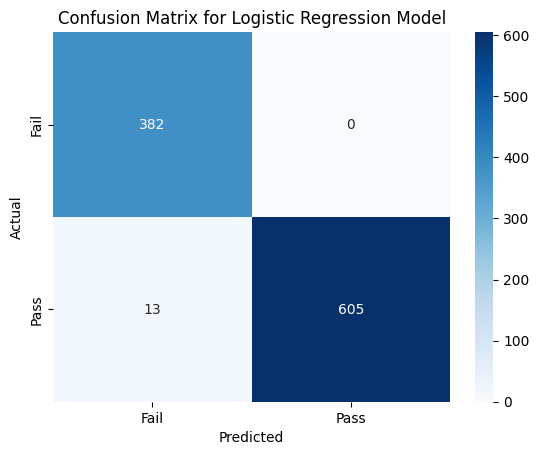

In [16]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred_lr=lr.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred_lr)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred_lr))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [13]:
feature_importance= pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print('\n-----Important Features-----')
print(feature_importance)


-----Important Features-----
              Feature  Coefficient
2         Past_Grades    12.490215
3     attendance_rate     0.082052
5   question_attemted    -0.012131
1   Time_Spent_On_App    -0.047532
0          Student_ID    -0.062839
4  time_spent_on_quiz    -0.123135


C:\Users\simra\AppData\Local\Temp\ipykernel_25140\3416384852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


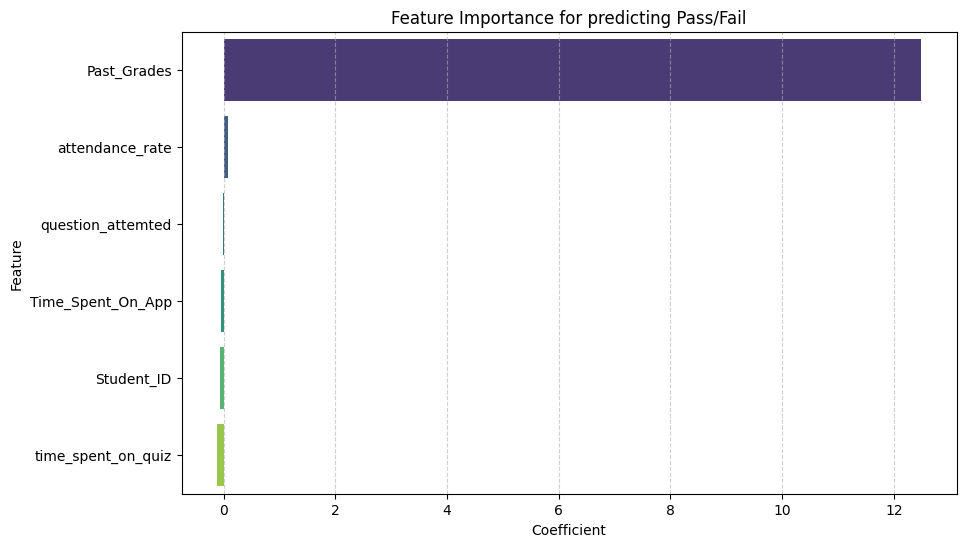

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance for predicting Pass/Fail")
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--',alpha=0.6)
plt.show()


 Model training complete
Accuracy :  0.9840

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.96      1.00      0.98       382
        Pass       1.00      0.97      0.99       618

    accuracy                           0.98      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.98      0.98      0.98      1000


 Confusion Matrix :


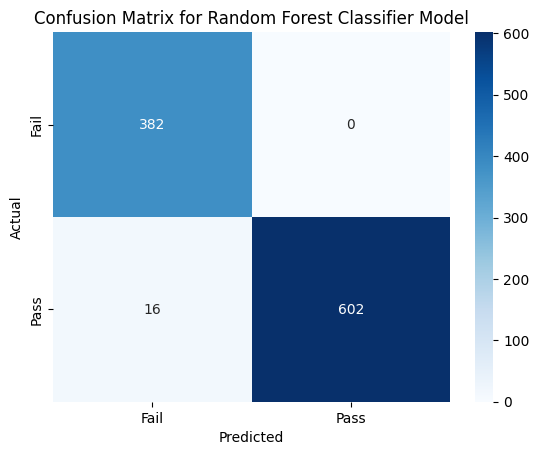

In [15]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred_rf=rf.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred_rf)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred_rf))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.show()

c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


0.5037499999999999


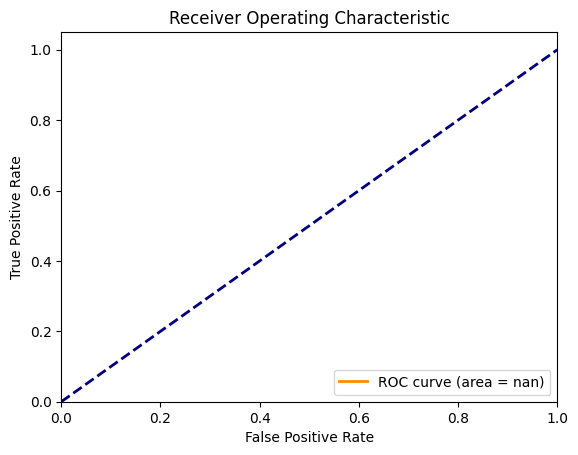

In [46]:
y_probs = lr.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_probs)

print(roc_auc)

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

0.48860833333333337


c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


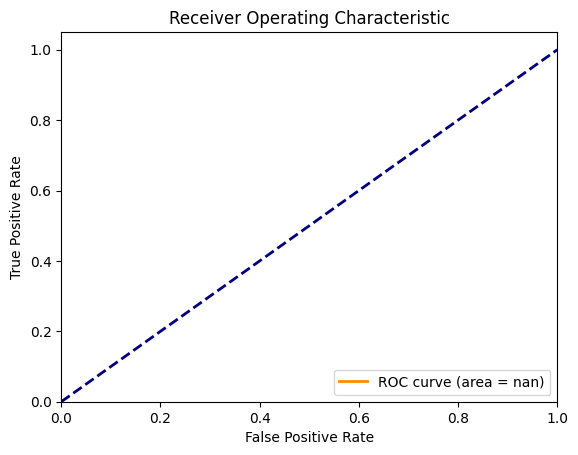

In [52]:
y_probs = rf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_probs)

print(roc_auc)

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


 Model training complete
Accuracy :  0.9320

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.86      0.98      0.92       382
        Pass       0.99      0.90      0.94       618

    accuracy                           0.93      1000
   macro avg       0.92      0.94      0.93      1000
weighted avg       0.94      0.93      0.93      1000


 Confusion Matrix :


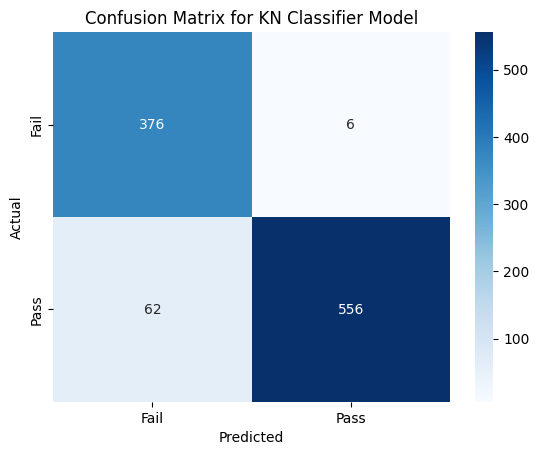

In [17]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred=knn.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KN Classifier Model')
plt.show()

c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


0.6425000000000001


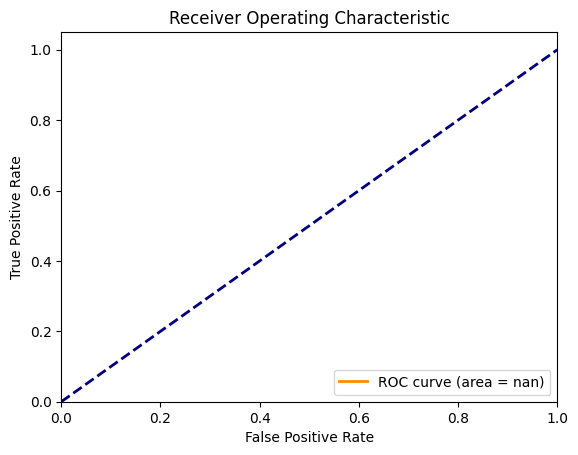

In [49]:
y_probs = knn.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_probs)

print(roc_auc)

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


 Model training complete
Accuracy :  0.9870

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.97      1.00      0.98       382
        Pass       1.00      0.98      0.99       618

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


 Confusion Matrix :


Text(0.5, 1.0, 'Confusion Matrix MLP Classifier')

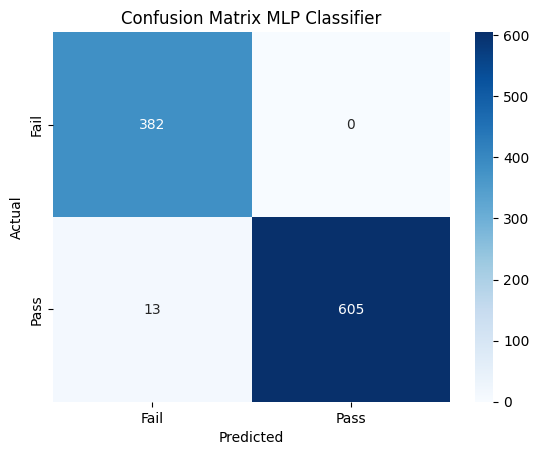

In [18]:
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred=mlp.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix MLP Classifier')


 Model training complete
Accuracy :  0.9880

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.99      0.99      0.99       406
        Pass       0.99      0.99      0.99       594

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


 Confusion Matrix :


Text(0.5, 1.0, 'Confusion Matrix')

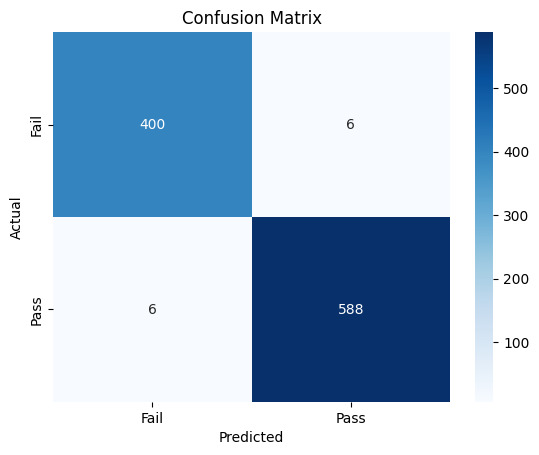

In [ ]:
svm=SVC(random_state=42)
svm.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred=svm.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')


 Model training complete
Accuracy :  0.9910

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.98      1.00      0.99       406
        Pass       1.00      0.98      0.99       594

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


 Confusion Matrix :


Text(0.5, 1.0, 'Confusion Matrix')

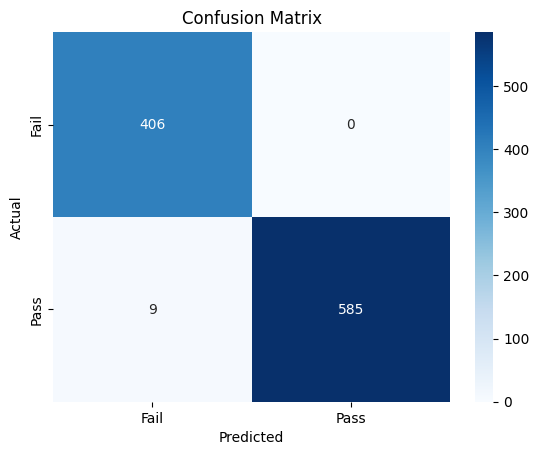

In [27]:
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred=tree.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


 Model training complete
Accuracy :  0.9060

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.81      1.00      0.90       406
        Pass       1.00      0.84      0.91       594

    accuracy                           0.91      1000
   macro avg       0.91      0.92      0.91      1000
weighted avg       0.92      0.91      0.91      1000


 Confusion Matrix :


Text(0.5, 1.0, 'Confusion Matrix')

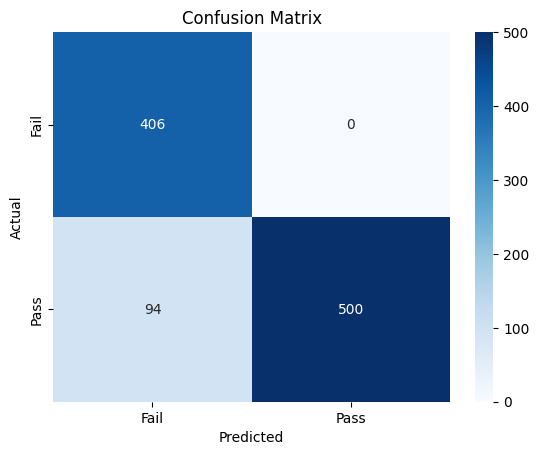

In [28]:
bnb=BernoulliNB()
bnb.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred=bnb.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


 Model training complete
Accuracy :  0.9910

 Classification Report :
              precision    recall  f1-score   support

        Fail       0.98      1.00      0.99       406
        Pass       1.00      0.98      0.99       594

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


 Confusion Matrix :


Text(0.5, 1.0, 'Confusion Matrix')

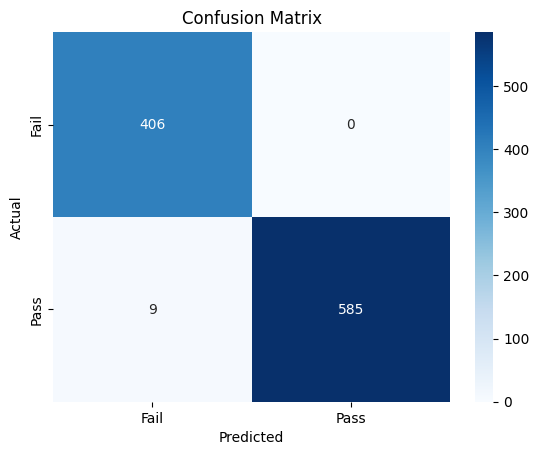

In [29]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=42)
gbc.fit(X_train_scale, y_train)
print('\n Model training complete')
y_pred=gbc.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy: .4f}')
print('\n Classification Report :')
print(classification_report(y_test,y_pred))
print("\n Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True ,fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [18]:
import pickle

with open ('rf.pkl','wb') as file:
    pickle.dump(rf, file)

In [31]:
student_performance.head()

,Student_ID,Time_Spent_On_App,Past_Grades,attendence_rate,time_spent_on_quiz,question_attemted,pass_fail,topic_difficulty,future_score
0,1,0.176589,2,68,3.535014,2,Fail,High,64.180529
1,2,1.518682,36,98,4.896629,46,Fail,High,65.255068
2,3,1.322999,80,57,0.880137,37,Pass,Low,93.536741
3,4,6.643621,63,70,2.000264,27,Pass,Low,80.187325
4,5,6.043621,70,80,0.442356,15,Pass,Low,88.683934
